## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Classification Modelling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import warnings

warnings.filterwarnings('ignore')


In [4]:
pip freeze | grep -E "numpy|pandas|matplotlib|seaborn|scikit-learn|xgboost|catboost|joblib|flask"

catboost==1.2.7
joblib==1.3.1
matplotlib==3.7.1
matplotlib-inline==0.1.6
numpy==1.25.0
pandas==2.0.3
pandas-datareader==0.10.0
scikit-learn==1.3.0
seaborn==0.12.2
xgboost==2.1.3
Note: you may need to restart the kernel to use updated packages.


In [5]:
df_train=pd.read_csv('data/train_F3fUq2S.csv')
df_test=pd.read_csv('data/test_Bk2wfZ3.csv')

In [6]:
df_train.head(5)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,clicked
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,14,0.103079,1
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,10,0.700000,1
2,3,3,59,12801,16,5,1,Noon,2,11,...,0,1,0,0,0,0,0,16,0.002769,0
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,10,0.010868,1
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,1,0,0,0,0,0,14,0.142826,1


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [8]:
df_train

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,clicked
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,14,0.103079,1
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,10,0.700000,1
2,3,3,59,12801,16,5,1,Noon,2,11,...,0,1,0,0,0,0,0,16,0.002769,0
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,10,0.010868,1
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,1,0,0,0,0,0,14,0.142826,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1884,3,88,1451,75,2,0,Noon,2,11,...,0,1,0,0,0,0,0,10,0.350746,1
1884,1885,3,58,10537,40,2,0,Evening,2,11,...,0,0,0,0,0,0,0,11,0.004728,0
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,6,0.008289,0
1886,1887,3,58,10537,40,1,0,Evening,2,11,...,0,0,0,0,0,0,0,16,0.012014,1


In [9]:
df_train.drop(columns=['campaign_id','click_rate','is_personalised','is_timer','is_emoticons','is_discount','is_price','is_urgency','sender','target_audience'],inplace=True)

### Data Preprocessing

From the  data analysis made we came to know that some features are dominating in train dataset.
Also if we can check statistically those features having very correlation with target features.
Those features can ve dropeed from train and test data set.

In [10]:
def handle_outliers(df,feature):

    IQR=(df[feature].quantile(0.75))-(df[feature].quantile(0.25))
    lower_limit=df[feature].quantile(0.25)-(IQR * 1.5)
    upper_limit=df[feature].quantile(0.75)+(IQR * 1.5)

    df_train.loc[df[feature]>=upper_limit,feature]=upper_limit
    df_train.loc[df[feature]<=lower_limit,feature]=lower_limit

    return df[feature]

In [11]:
outlier_features=['no_of_CTA','mean_paragraph_len','body_len','subject_len','mean_CTA_len']

for i in range(len(outlier_features)):
    handle_outliers(df_train,outlier_features[i])

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   subject_len         1888 non-null   float64
 1   body_len            1888 non-null   int64  
 2   mean_paragraph_len  1888 non-null   float64
 3   day_of_week         1888 non-null   int64  
 4   is_weekend          1888 non-null   int64  
 5   times_of_day        1888 non-null   object 
 6   category            1888 non-null   int64  
 7   product             1888 non-null   int64  
 8   no_of_CTA           1888 non-null   float64
 9   mean_CTA_len        1888 non-null   int64  
 10  is_image            1888 non-null   int64  
 11  is_quote            1888 non-null   int64  
 12  clicked             1888 non-null   int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 191.9+ KB


Onehot encoder function is particularly useful in preprocessing steps for machine learning models, especially when dealing with categorical data. It ensures that categorical features are converted into a numerical format that can be utilized effectively in modeling.

To apply one-hot encoding to specific categorical features in your datasets, iterate through a list of feature names and call the `onehot_encoders` function, updating both the training and test datasets in the process.

In [13]:
from sklearn.preprocessing import OneHotEncoder

def onehot_encoders(feature, train_data, test_data):
    encoder_ = OneHotEncoder(handle_unknown='ignore')
    
    # Fit and transform the training data
    train_encoded = encoder_.fit_transform(train_data[[feature]])
    
    # Transform the test data
    test_encoded = encoder_.transform(test_data[[feature]])
    
    # Update the original DataFrames with the encoded values
    train_data = train_data.drop(columns=[feature])
    test_data = test_data.drop(columns=[feature])
    
    # Add the encoded columns back to the DataFrames
    train_data = train_data.join(pd.DataFrame(train_encoded.toarray(), columns=encoder_.get_feature_names_out([feature]), index=train_data.index))
    test_data = test_data.join(pd.DataFrame(test_encoded.toarray(), columns=encoder_.get_feature_names_out([feature]), index=test_data.index))

    return train_data, test_data

# Apply one-hot encoding to both training and test sets
onehot_encoding_features = ['is_weekend',  'day_of_week', 'times_of_day']

for feature in onehot_encoding_features:
    df_train, df_test = onehot_encoders(feature, df_train, df_test)

#### Model Training-:


In [14]:
X=df_train.drop(['clicked'] ,axis=1)
Y=df_train['clicked']

In [15]:
df_train.columns

Index(['subject_len', 'body_len', 'mean_paragraph_len', 'category', 'product',
       'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_quote', 'clicked',
       'is_weekend_0', 'is_weekend_1', 'day_of_week_0', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'times_of_day_Evening', 'times_of_day_Morning',
       'times_of_day_Noon'],
      dtype='object')

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid=train_test_split(X,Y,random_state=42,test_size=0.2)

In [17]:
print('Train', X_train.shape, y_train.shape)
print('Validation', X_valid.shape, y_valid.shape)

Train (1510, 21) (1510,)
Validation (378, 21) (378,)


In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)

X_valid=scaler.transform(X_valid)

In [19]:
X_train

array([[-0.6215672 ,  1.78139195, -0.98050813, ...,  0.65258981,
        -0.25471575, -0.55848249],
       [-1.24797418,  0.29026212, -0.98050813, ...,  0.65258981,
        -0.25471575, -0.55848249],
       [ 0.33892351, -1.07534759,  1.0651123 , ...,  0.65258981,
        -0.25471575, -0.55848249],
       ...,
       [ 1.13237236, -0.07365375, -0.45260609, ...,  0.65258981,
        -0.25471575, -0.55848249],
       [-1.24797418, -0.95784594,  1.52702659, ...,  0.65258981,
        -0.25471575, -0.55848249],
       [-0.16220207, -0.04620586, -0.25464282, ...,  0.65258981,
        -0.25471575, -0.55848249]])

In [20]:
import pandas as pd

# Check the distribution of the target variable
class_distribution = y_train.value_counts(normalize=True)  # Gives proportion of each class
print(class_distribution)

clicked
1    0.503974
0    0.496026
Name: proportion, dtype: float64


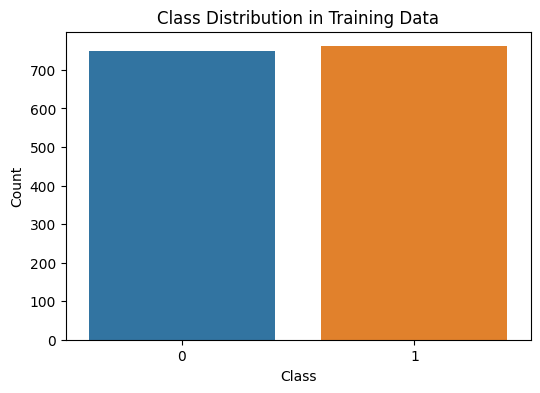

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def evaluate_model(model, X_train, y_train, X_valid, y_valid):
    # Fit the model on training data
    model.fit(X_train, y_train)

    # Predict on training and validation data
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)

    # Calculate metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)

    # Calculate metrics for validation set
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    valid_f1 = f1_score(y_valid, y_valid_pred)
    valid_precision = precision_score(y_valid, y_valid_pred)
    valid_recall = recall_score(y_valid, y_valid_pred)

    # Print results
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(train_accuracy))
    print("- F1 Score: {:.4f}".format(train_f1))
    print("- Precision: {:.4f}".format(train_precision))
    print("- Recall: {:.4f}".format(train_recall))
    
    print('----------------------------------')
    
    print('Model performance for Validation set')
    print("- Accuracy: {:.4f}".format(valid_accuracy))
    print("- F1 Score: {:.4f}".format(valid_f1))
    print("- Precision: {:.4f}".format(valid_precision))
    print("- Recall: {:.4f}".format(valid_recall))
    print('=' * 35)

In [23]:
def print_model_results(results):
    for model_name, metrics in results.items():
        print(model_name)
        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(metrics["train"][0]))
        print("- F1 Score: {:.4f}".format(metrics["train"][1]))
        print("- Precision: {:.4f}".format(metrics["train"][2]))
        print("- Recall: {:.4f}".format(metrics["train"][3]))
        print('----------------------------------')
        print('Model performance for Validation set')
        print("- Accuracy: {:.4f}".format(metrics["test"][0]))
        print("- F1 Score: {:.4f}".format(metrics["test"][1]))
        print("- Precision: {:.4f}".format(metrics["test"][2]))
        print("- Recall: {:.4f}".format(metrics["test"][3]))
        print('=' * 35)
        print('\n')


In [24]:

# Define the classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000)
    # ,
    # "KNeighbors Classifier": KNeighborsClassifier(),
    # "Decision Tree Classifier": DecisionTreeClassifier(),
    # "Random Forest Classifier": RandomForestClassifier(),
    # "XGB Classifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    # "CatBoost Classifier": CatBoostClassifier(verbose=False),
    # "AdaBoost Classifier": AdaBoostClassifier()
}

for model_name, model in models.items():
    print(f"Evaluating {model_name}")
    evaluate_model(model, X_train, y_train, X_valid, y_valid)

# Print results
# print_model_results(results)



Evaluating Logistic Regression
Model performance for Training set
- Accuracy: 0.6596
- F1 Score: 0.6573
- Precision: 0.6671
- Recall: 0.6478
----------------------------------
Model performance for Validation set
- Accuracy: 0.6905
- F1 Score: 0.6929
- Precision: 0.6667
- Recall: 0.7213


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Define different regularizations
regularization_options = {
    'No Regularization': LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000),  
    'L1 Regularization': LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000),
    'L2 Regularization': LogisticRegression(penalty='l2', solver='lbfgs', C=1.0, max_iter=1000)
}

# Evaluate each model with different regularization
for reg_type, model in regularization_options.items():
    print(f"Evaluating {reg_type}")
    evaluate_model(model, X_train, y_train, X_valid, y_valid)


Evaluating No Regularization
Model performance for Training set
- Accuracy: 0.6596
- F1 Score: 0.6573
- Precision: 0.6671
- Recall: 0.6478
----------------------------------
Model performance for Validation set
- Accuracy: 0.6905
- F1 Score: 0.6929
- Precision: 0.6667
- Recall: 0.7213
Evaluating L1 Regularization
Model performance for Training set
- Accuracy: 0.6583
- F1 Score: 0.6551
- Precision: 0.6667
- Recall: 0.6439
----------------------------------
Model performance for Validation set
- Accuracy: 0.6905
- F1 Score: 0.6913
- Precision: 0.6684
- Recall: 0.7158
Evaluating L2 Regularization
Model performance for Training set
- Accuracy: 0.6596
- F1 Score: 0.6573
- Precision: 0.6671
- Recall: 0.6478
----------------------------------
Model performance for Validation set
- Accuracy: 0.6905
- F1 Score: 0.6929
- Precision: 0.6667
- Recall: 0.7213


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Define the parameter grid for C and penalty
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Values of C to try
    'penalty': ['l1', 'l2'],               # Regularization methods
    'solver': ['liblinear']                # 'liblinear' supports L1 regularization
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best hyperparameters found
print(f"Best hyperparameters: {grid_search.best_params_}")

# Best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_valid_pred = best_model.predict(X_valid)
validation_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Accuracy with tuned parameters: {validation_accuracy:.4f}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Validation Accuracy with tuned parameters: 0.6931


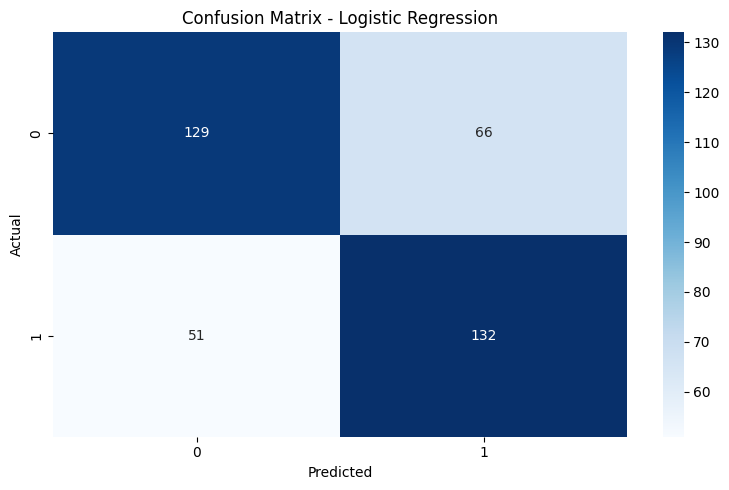

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import math

def plot_confusion_matrices(models, X_valid, y_valid):
    # Calculate number of rows and columns based on the number of models
    n_models = len(models)
    n_cols = 2
    n_rows = math.ceil(n_models / n_cols)  # Calculate number of rows needed
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))  # Create subplots for each model
    axs = axs.flatten()  # Flatten the 2D axis to 1D for easy iteration
    
    for idx, (model_name, model) in enumerate(models.items()):
        # Predict the validation set
        y_valid_pred = model.predict(X_valid)
        
        # Get confusion matrix
        cm = confusion_matrix(y_valid, y_valid_pred)
        
        # Plot confusion matrix
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[idx])
        axs[idx].set_title(f'Confusion Matrix - {model_name}')
        axs[idx].set_xlabel('Predicted')
        axs[idx].set_ylabel('Actual')
    
    # Remove any unused subplots (in case of odd number of models)
    for i in range(idx + 1, len(axs)):
        fig.delaxes(axs[i])

    plt.tight_layout()
    plt.show()

# Call the function after training models
plot_confusion_matrices(models, X_valid, y_valid)


In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# Sample dataset (replace with your actual data)
# X_train, y_train should be defined prior to this code

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Get feature names (assuming X_train is a DataFrame)
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else np.arange(X_train.shape[1])

# Get coefficients
coefficients = model.coef_[0]  # For binary classification, it's a 1D array

# Create a DataFrame for better visualization
features_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Calculate the absolute values of coefficients for ranking
features_df['Absolute Coefficient'] = features_df['Coefficient'].abs()

# Sort features by absolute coefficient values
best_features = features_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top features
print("Top Features by Coefficient:")
print(best_features.head())  # Display top N features


Top Features by Coefficient:
    Feature  Coefficient  Absolute Coefficient
0         0    -0.325961              0.325961
2         2    -0.317314              0.317314
5         5    -0.303763              0.303763
19       19     0.273489              0.273489
4         4     0.238021              0.238021


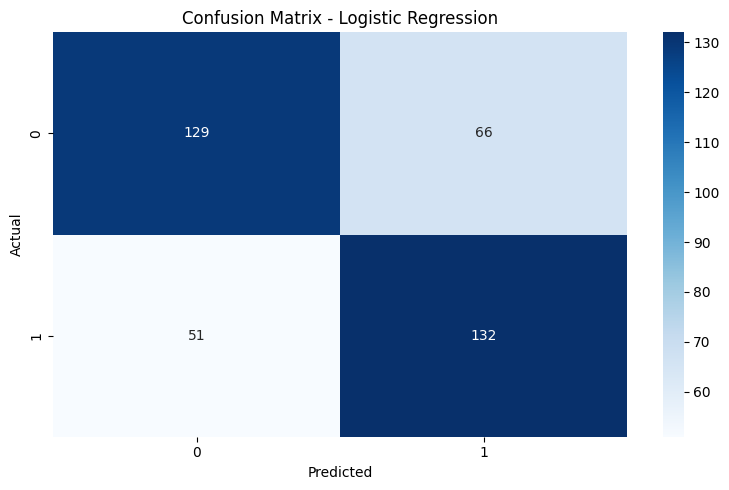

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import math

def plot_confusion_matrices(models, X_valid, y_valid):
    # Calculate number of rows and columns based on the number of models
    n_models = len(models)
    n_cols = 2
    n_rows = math.ceil(n_models / n_cols)  # Calculate number of rows needed
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))  # Create subplots for each model
    axs = axs.flatten()  # Flatten the 2D axis to 1D for easy iteration
    
    for idx, (model_name, model) in enumerate(models.items()):
        # Predict the validation set
        y_valid_pred = model.predict(X_valid)
        
        # Get confusion matrix
        cm = confusion_matrix(y_valid, y_valid_pred)
        
        # Plot confusion matrix
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[idx])
        axs[idx].set_title(f'Confusion Matrix - {model_name}')
        axs[idx].set_xlabel('Predicted')
        axs[idx].set_ylabel('Actual')
    
    # Remove any unused subplots (in case of odd number of models)
    for i in range(idx + 1, len(axs)):
        fig.delaxes(axs[i])

    plt.tight_layout()
    plt.show()

# Call the function after training models
plot_confusion_matrices(models, X_valid, y_valid)


In [30]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define parameter grids for the models
param_grids = {
    "Decision Tree": {
        "max_depth": [5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "XGB Classifier": {
        "max_depth": [5, 10, 15],
        "learning_rate": [0.01, 0.1, 0.2],
        "n_estimators": [100, 200]
    }
}

# Models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGB Classifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Perform grid search
best_models = {}
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=kf, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Save the best model
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")


Tuning hyperparameters for Decision Tree...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Decision Tree: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validated accuracy: 0.6523
Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for Random Forest: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validated accuracy: 0.7351
Tuning hyperparameters for XGB Classifier...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for XGB Classifier: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100}
Best cross-validated accuracy: 0.7179


Model: Decision Tree
Validation Accuracy: 0.6614
Validation F1 Score: 0.6484
Validation Precision: 0.6519
Validation Recall: 0.6448
Model: Random Forest
Validation Accuracy: 0.7513
Validation F1 Score: 0.7473
Validation Precision: 0.7354
Validation Recall: 0.7596
Model: XGB Classifier
Validation Accuracy: 0.7381
Validation F1 Score: 0.7302
Validation Precision: 0.7283
Validation Recall: 0.7322


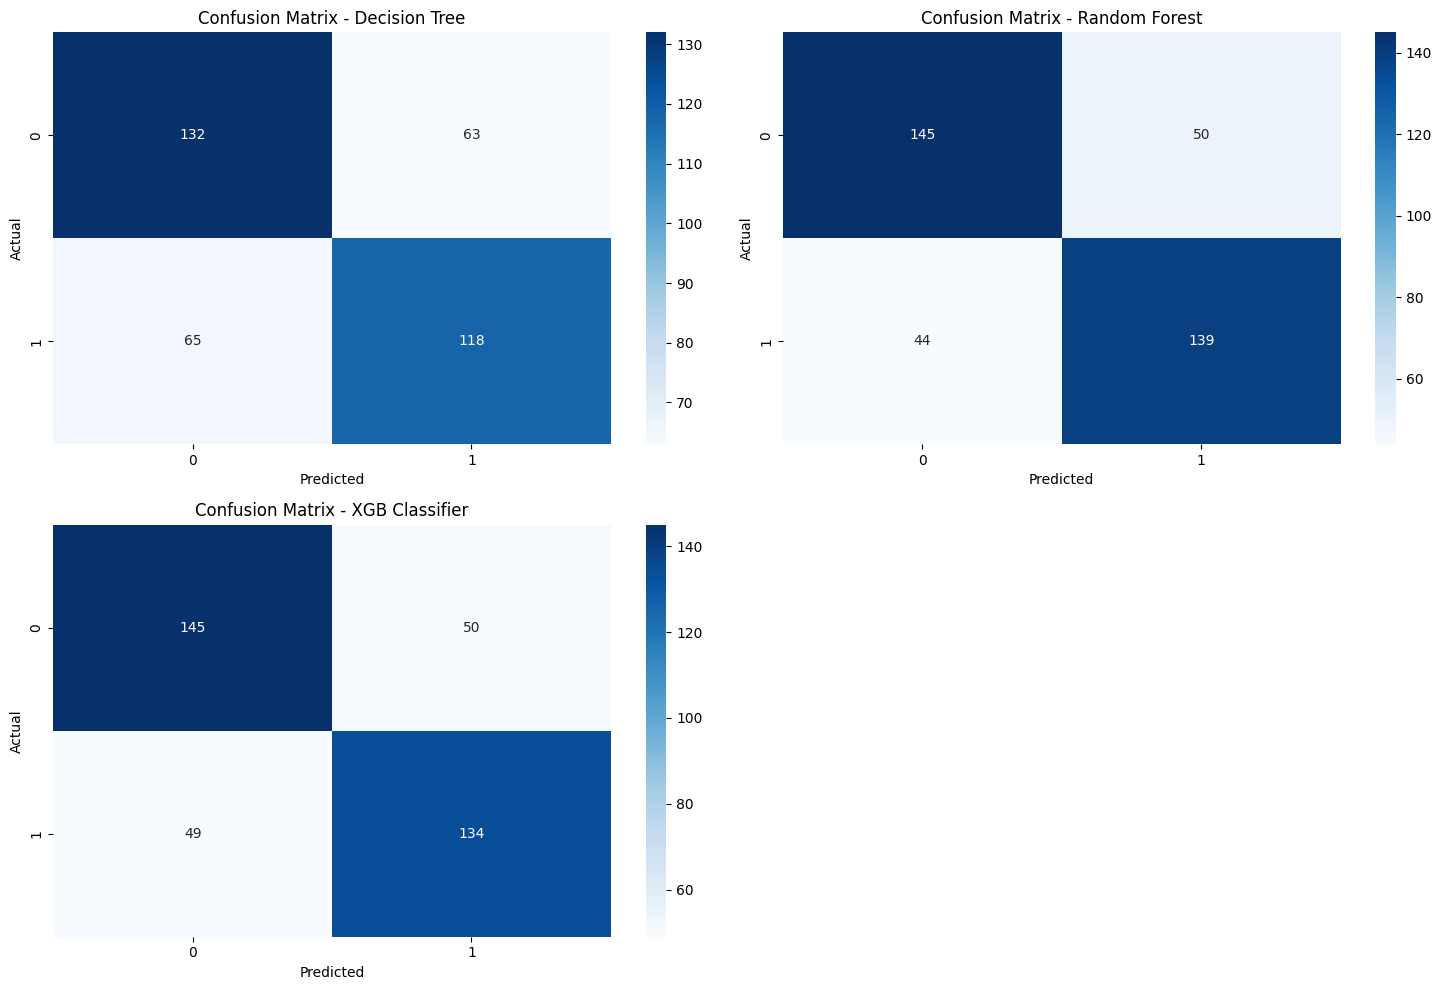

In [31]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Train the best models on the entire training set
best_models['Decision Tree'].fit(X_train, y_train)
best_models['Random Forest'].fit(X_train, y_train)
best_models['XGB Classifier'].fit(X_train, y_train)

# Dictionary to store results for validation set
validation_results = {}

# Evaluate each model on the validation set
for model_name, model in best_models.items():
    y_valid_pred = model.predict(X_valid)
    
    # Calculate metrics
    accuracy = accuracy_score(y_valid, y_valid_pred)
    f1 = f1_score(y_valid, y_valid_pred)
    precision = precision_score(y_valid, y_valid_pred)
    recall = recall_score(y_valid, y_valid_pred)
    
    # Store results
    validation_results[model_name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    }
    
    # Print the performance
    print(f"Model: {model_name}")
    print(f"Validation Accuracy: {accuracy:.4f}")
    print(f"Validation F1 Score: {f1:.4f}")
    print(f"Validation Precision: {precision:.4f}")
    print(f"Validation Recall: {recall:.4f}")
    print("="*40)

# Plot the confusion matrices for each model
plot_confusion_matrices(best_models, X_valid, y_valid)


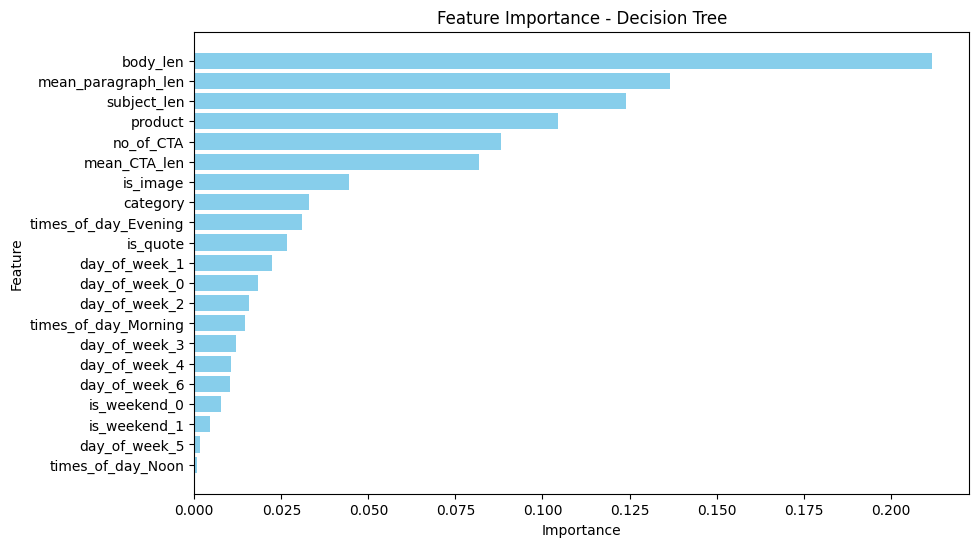

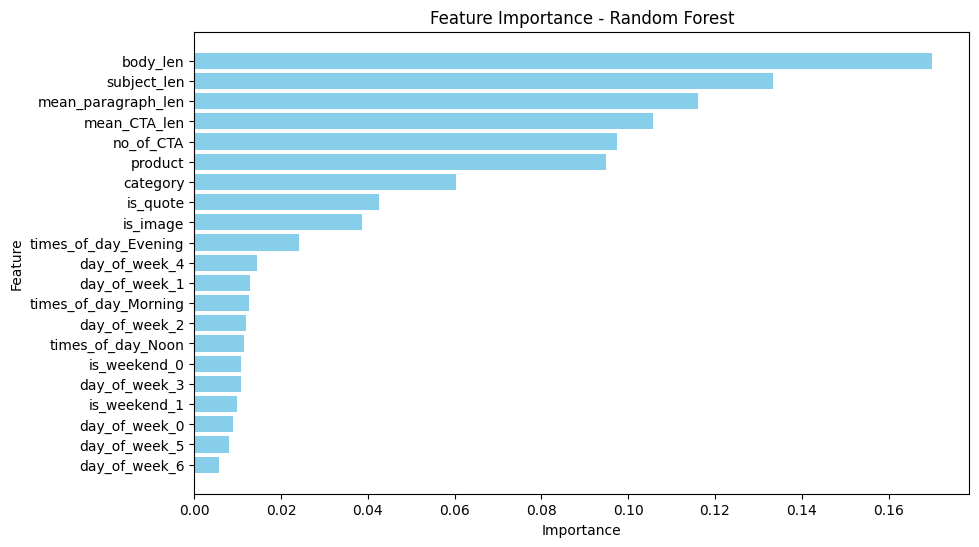

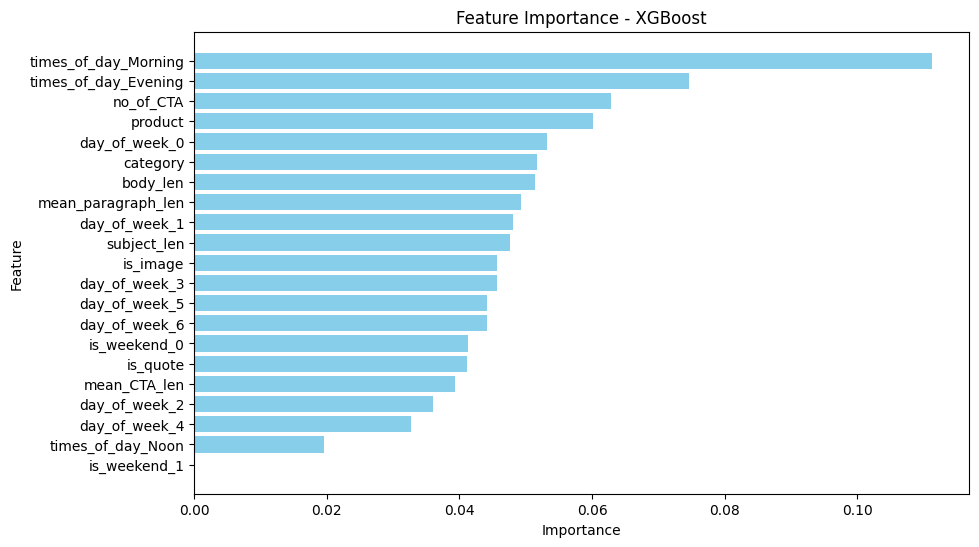

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_feature_importance(model, feature_names, model_name):
    # Get feature importances from the model
    importances = model.feature_importances_
    
    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    
    # Sort the features by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.gca().invert_yaxis()
    plt.show()

# Example usage for Decision Tree, Random Forest, and XGBoost
plot_feature_importance(best_models['Decision Tree'], X.columns, "Decision Tree")
plot_feature_importance(best_models['Random Forest'], X.columns, "Random Forest")
plot_feature_importance(best_models['XGB Classifier'], X.columns, "XGBoost")
